In [1]:
import pandas as pd

domaine = pd.read_csv('domaine-nc.csv')

# les dates sont en texte par defaut, on convertit en datetime
domaine['dateCreation'] = pd.to_datetime(domaine['dateCreation'])
domaine['dateModification'] = pd.to_datetime(domaine['dateModification'])
domaine['dateExpiration'] = pd.to_datetime(domaine['dateExpiration'])

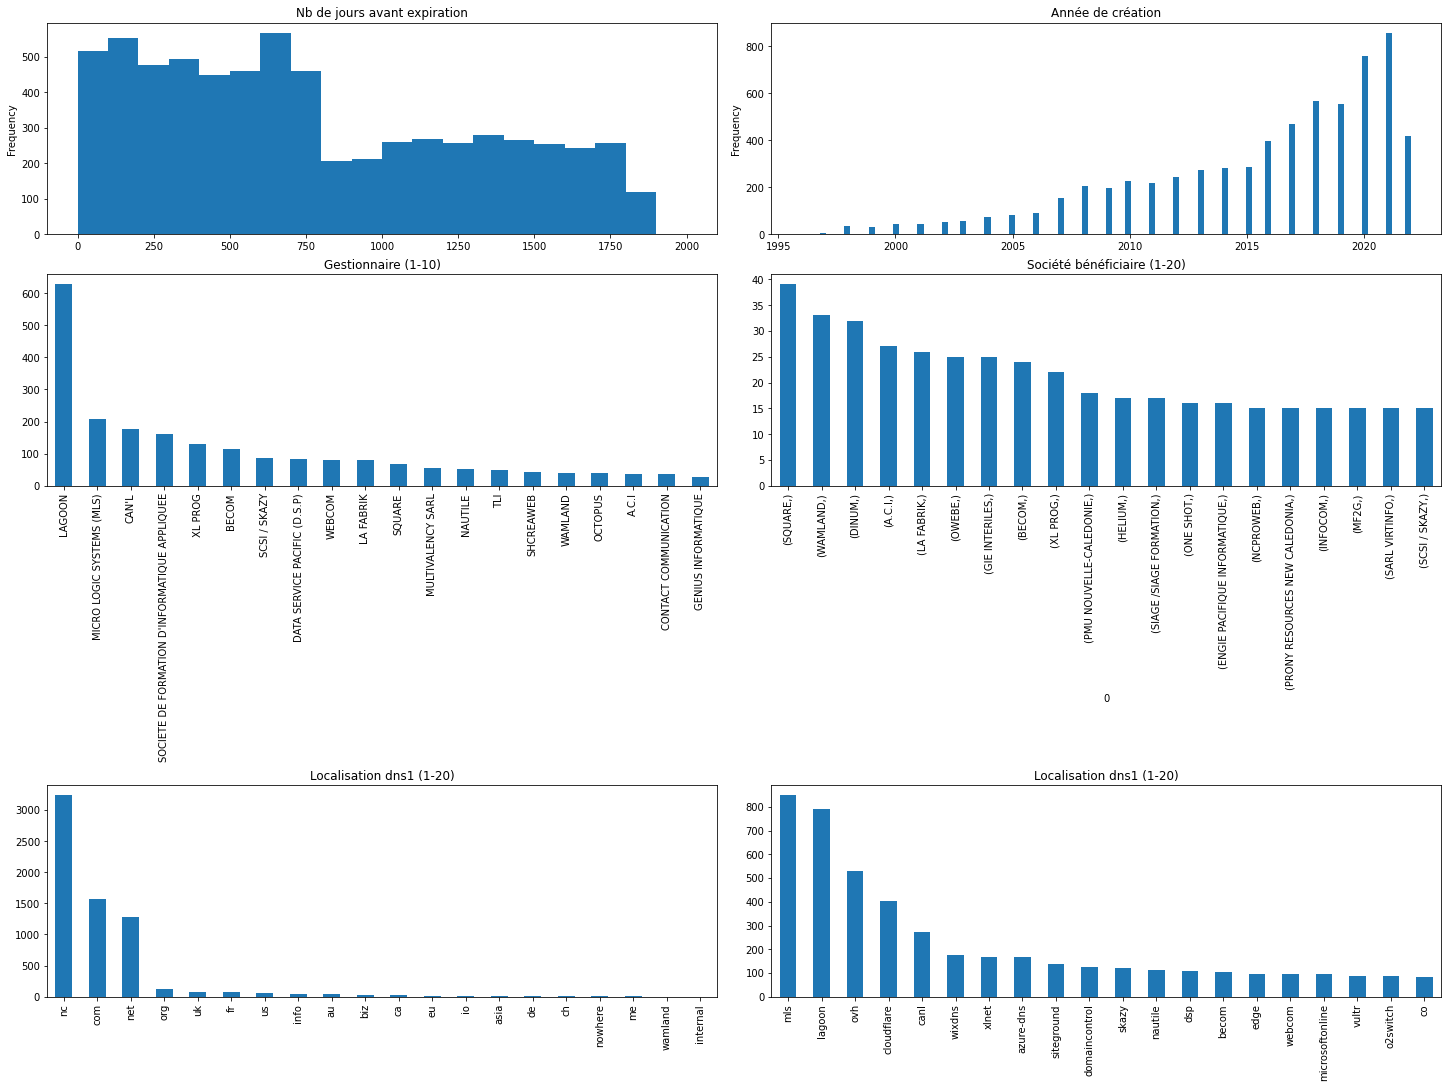

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15), constrained_layout=True)

# jours avant expiration en histogramme
domaine.nbDaysBeforeExpires.plot(kind='hist', bins=100, range=(0,2000), title='Nb de jours avant expiration', ax=ax[0,0])

# année de création en histogramme
domaine.dateCreation.dt.year.plot(kind='hist', bins=100, title='Année de création', ax=ax[0,1])

# gestionnaires de domaines par nombre de domaines gérés
gestionnaire = domaine[domaine.gestionnaire != 'AUCUN'].gestionnaire.value_counts()
gestionnaire.head(20).plot(kind='bar', title='Gestionnaire (1-10)', ax=ax[1,0])

# societés bénéficiaires des domaines par nombre de domaines
benef = domaine.beneficiaire.str.extract(r'Ridet : [0-9]{7}-[0-9]{3} (.*)').value_counts()
benef.head(20).plot(kind='bar', title='Société bénéficiaire (1-20)', ax=ax[1,1])

# extension dns de domaines par nombre de domaines
dns = domaine.dns1.str.split('.').str[-1].value_counts()
dns.head(20).plot(kind='bar', title='Localisation dns1 (1-20)', ax=ax[2,0])

# serveur dns de domaines par nombre de domaines
dns = domaine.dns1.str.split('.').str[-2].value_counts()
dns.head(20).plot(kind='bar', title='Localisation dns1 (1-20)', ax=ax[2,1])

plt.show()